<a href="https://colab.research.google.com/github/erinijapranckeviciene/ppolygenic/blob/master/ppolygenic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Functions to compute and use TGS**

In [6]:
from math import erf,exp
from itertools import product

import numpy as np
import csv


################################################################################
# Data structure  markers to store information about the multimaarker phenotype
#
markers = \
    {'injury': \
     {'rs12722':  {'gene':'COL5A1','genotype_scores':{'TT':1,'CT':0,'CC':-1},'frequencies':{'TT':0.07,'CT':0.36,'CC':0.57}, 'conf': 1},\
      'rs1800012':{'gene':'COL1A1','genotype_scores':{'CC':0,'AC':0,'AA':-1},'frequencies':{'CC':0.66,'AC':0.30,'AA':0.04}, 'conf': 1},\
      'rs679620': {'gene':'MMP3',  'genotype_scores':{'AA':1,'AG':0,'GG':-1},'frequencies':{'AA':0.31,'AG':0.53,'GG':0.16}, 'conf': 0.75}},\
    'endurance_power': \
     {'rs699':     {'gene':'AGT', 'genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.0676, 'AG': 0.3848, 'GG': 0.5476},'allele_freq':{'A':0.26,'G':0.74}, 'conf': 1},\
      'rs1042713': {'gene':'ADRB2','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.2304, 'AG': 0.4992, 'GG': 0.2704},'allele_freq':{'A':0.48,'G':0.52}, 'conf': 1},\
      'rs11549465':{'gene':'HIF1A','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.8575, 'CT': 0.1370, 'TT': 0.0055},'allele_freq':{'C':0.926,'T':0.074}, 'conf': 1}},\
    'vitaminB12': \
     {'rs1801133':    {'gene':'MTHFR', 'genotype_scores':{'GG': 0, 'AG': -0.7, 'AA': -1},'frequencies':{'GG': 0.57, 'AG': 0.33, 'AA': 0.1},'conf': 1},\
      'rs602662': {'gene':'FUT2','genotype_scores':{'AA': 0.7, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.20, 'AG': 0.35, 'GG': 0.45}, 'conf': 1},\
      'rs526934':{'gene':'TCN1','genotype_scores':{'AA': 0, 'AG': -1, 'GG': -1},'frequencies':{'AA': 0.65, 'AG': 0.30, 'GG': 0.05}, 'conf': 1},\
      'rs1801222':{'gene':'CUBN','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.65, 'CT': 0.30, 'TT': 0.05}, 'conf': 1}}}



##############################################################################
# Data structure  -markers- extended with additional block of different markers
markers_plus ={ \
# Injury
'injury': \
     {'rs12722':  {'gene':'COL5A1','genotype_scores':{'TT':1,'CT':0,'CC':-1},'frequencies':{'TT':0.07,'CT':0.36,'CC':0.57}, 'conf': 1},\
      'rs1800012':{'gene':'COL1A1','genotype_scores':{'CC':0,'AC':0,'AA':-1},'frequencies':{'CC':0.66,'AC':0.30,'AA':0.04}, 'conf': 1},\
      'rs679620': {'gene':'MMP3',  'genotype_scores':{'AA':1,'AG':0,'GG':-1},'frequencies':{'AA':0.31,'AG':0.53,'GG':0.16}, 'conf': 0.75}},\

# Vilnius endurance_power
     'endurance_power_vilnius': \
                {'rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 1, 'ID': 0, 'II': -1},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 1, 'RX': 0, 'XX': -1},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'rs7293': {'gene':'MB','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 0.75},\
                 'rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 1, 'CT': -1, 'TT': -1},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 0.75}},\

# Endurance_power
    'endurance_power': \
     {'rs699':     {'gene':'AGT', 'genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.0676, 'AG': 0.3848, 'GG': 0.5476},'allele_freq':{'A':0.26,'G':0.74}, 'conf': 1},\
      'rs1042713': {'gene':'ADRB2','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.2304, 'AG': 0.4992, 'GG': 0.2704},'allele_freq':{'A':0.48,'G':0.52}, 'conf': 1},\
      'rs11549465':{'gene':'HIF1A','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.8575, 'CT': 0.1370, 'TT': 0.0055},'allele_freq':{'C':0.926,'T':0.074}, 'conf': 1}}}

#################################################################
# Labels to generate synthetic data
labels={'injury':{'risk':0.50,'no-risk':0.5},'endurance_power':{'endurance':0.35,'mix':0.35,'power':0.30},'vitaminB12':{'high':0.20,'higher':0.20,'normal':0.20,'lower':0.20,'low':0.20}}
##################################################################
# TGS computation
def total_genotype_score(markers_list,markers_dict):
    """
    total_genotype_score(markers_list,markers_dict)
    Function: computes a total genotype score TGS
    Input: 
        markers_list: 
          string of comma separated pairs of a marker rs id
          followed by whitespace followed by a genotype. Example:
          markers_list='rs12722 TT, rs1800012 AA, rs679620 AG'
        markers_dict: 
          dictionary of markers. Example: markers['injury']  
    Return value: 
        float TGS:
          total genotype score computed as a dot product of two vectors 
          a vector of individual genotype scores and 
          a vector of marker confidence scores 
    """

    id_gt_pairs = markers_list.split(',')
    n_gt_pairs  = len(id_gt_pairs)
#    if n_gt_pairs <> 3 : # number of markers may be arbitrary, here 3  
    if n_gt_pairs < 2 : # test if it is multimarker, STOP if it is one marker
            return -101

    gt_score    = list() # vector of marker scores
    marker_conf = list() # vector of confidence scores
    for id_gt in id_gt_pairs:
        if len(id_gt.split()) != 2:
            print("<p> part is missing</p>")
            return -104

        (identity,genotype) = id_gt.split()
        #print identity, genotype
        if identity in markers_dict:
            marker_conf.append(float(markers_dict[identity]['conf']))
        else:
            print("<p> Invalid identity </p>")
            return -102 # Invalid identity

        if genotype in markers_dict[identity]['genotype_scores']:
            gt_score.append(float(markers_dict[identity]['genotype_scores'][genotype]))
        else:
            print("<p> Invalid genotype </p>")
            return -103 # Invalid genotype    
      
    # apply error function to map the score into [-1 , 1] interval
    score = sum([gt_score[i]*marker_conf[i] for i in range(0,n_gt_pairs)])

    # normalization constant is a sum of confidences
    normalization_constant = sum(markers_dict[i]['conf'] for i in markers_dict.keys())

    # normalized score
    normalized_score = score/normalization_constant

    #erf_score = erf(normalized_score)
    # apply sigmoid function and constant shift into interval [-1,1]
    #sigmoid_score = 1/(1+exp(-normalized_score))-0.5
    # return original score and a normalized_score
    #return [score,normalized_score,erf_score,sigmoid_score]
    return [score,normalized_score]

#####################################################################################  
# test total_genotype_score
def genotype_combinations_tgs(markers_dict):

    """
    Testing TGS function on all possible genotype combinations 
    It works with any type of markers and any number of marker states
    """
    genotypes_list    = list() # list of genotypes of each marker
    marker_names_list = list() # list of marker names (rs ids)

    for marker_id in markers_dict:
        genotypes_list.append(list(markers_dict[marker_id]['genotype_scores'].keys() ))
        #print(marker_id)
        marker_names_list.append(marker_id)
    #print("genotypes_list")    
    #print(genotypes_list)
    #print("marker_names_list")
    #print(marker_names_list)
    

    # Enumerate explicitly all possible combinations of genotypes.  
    # Generate string for a command: list(itertools.product(['TT','CT','CC'],...,['AA','AG','GG']))

    arg_i = list() # arguments for itertools.product()
    for marker_genotypes in genotypes_list:
        arg_i.append(str(marker_genotypes))
        #Evaluate itertools.product command and get all combinations of genotype indexes
        #print("arg_i")
        #print(arg_i)
        #arg_i : ["dict_keys(['TT', 'CT', 'CC'])", "dict_keys(['CC', 'AC', 'AA'])", "dict_keys(['AA', 'AG', 'GG'])"]
        #print("join")
        #print("list(product("+",".join(arg_i)+") )")
  
    genotype_combinations = eval("list(product("+",".join(arg_i)+"))")
    #print(genotype_combinations)

    tgs_vec               = list()
    table_gt_combinations = list()
    header = "Index"+","+",".join(marker_names_list)+","+",".join(["TGS","TGS_normalized"])
    table_gt_combinations.append(header)

    for gt_index,gt_combination in enumerate(genotype_combinations):
        arg_i=list() # arg_i parameter string to call TGS function
        for index,genotype in enumerate(gt_combination):
            arg_i.append(marker_names_list[index]+" "+genotype)
        # print(arg_i)    

        tgs = total_genotype_score(",".join(arg_i),markers_dict) # Compute TGS
        tgs_str = ["%.4f" % tgs[i] for i in range(len(tgs))]
        line=str(gt_index)+","+",".join(gt_combination)+","+",".join(tgs_str) #Add row to the table
        table_gt_combinations.append(line) #Add row to the table
        tgs_vec.append(tgs[0]) # TGS non-normalized 

    tgs_frequency_dist=list()     # Create dictionary for TGS frequency distribution 
    tgs_frequency_dist.append(['Value','Count'])
    tgs_values=list(set(tgs_vec)) # Count unique score occurrences
    for x in tgs_values:
        tgs_frequency_dist.append([x,tgs_vec.count(x)])
    # sort by value
    #print tgs_frequency_dist
    return [table_gt_combinations,tgs_frequency_dist]


#####################################################################################  
# generate sample of size n for multiple markers 
# add random phenotypic information
def generate_marker_table(markers,n,labels):
    """
    Input:
        markers - markers[phenotype] Ex: markers['injury']
        n -  number of rows in the sample
        labels - dictionary of phenotype labels Ex: {'endurance':0.35,'mix':0.35,'power':0.30} 
    Output:
        table in which each column represents a marker
        last column  class represents phenotypic information 
    """
    table = {}
    for rsid in markers.keys():
        m = np.random.choice(markers[rsid]['frequencies'].keys(),n,markers[rsid]['frequencies'].values())
        table[rsid] = m
    table['class'] = np.random.choice(labels.keys(),n,labels.values())
    return table


#####################################################################################  
# write synthetic multi marker table to file
def marker_table_to_csv(marker_table, output_csv_file_name):

    # create object to write to csv file
    csv_writer = csv.writer(open(output_csv_file_name,'w'),delimiter=',')
    header = marker_table.keys()
    n = len(marker_table[header[0]])
    csv_writer.writerow(header)
    for i in range(n):
        csv_writer.writerow([marker_table[k][i] for k in header])

####### Data with labels prepare for testing ##############################
# Read markers from csv , compute TGS, 
# write markers and TGS to csv for testing in another envirinment
def class_table_csv_for_testing(input_csv_file_name, phenotype_markers, output_csv_file_name):
    class_table = list()
    with open(input_csv_file_name) as csvfile:
        reader = csv.DictReader(csvfile)
        #only extract keys that begin with rs
        for row in reader:
            markers = list()
            rsids = [s for s in row.keys() if 'rs' in s] 
            #print rsids
            # create markers_list input to tgs_function
            for rsid in rsids:
                markers.append(' '.join([rsid,row[rsid]]))
            markers_list = ','.join(markers)
            # compute total genotype score
            rez =total_genotype_score(markers_list, phenotype_markers) 
            rezs = [str(r) for r in rez]
            s=','.join(rezs) 

            line = ','.join([markers_list,row['class'],','.join(rezs)])
            class_table.append(line.split(','))
    #print output_csv_file_name
    with open(output_csv_file_name,'w') as outf:
        for row in class_table:
            row_str=",".join(row)
            #print row_str
            outf.write("%s\n" % row_str)

    return class_table
####### END OF FUNCTIONS ##############################


# Modeling LT athelete's TGS scores 

In [ ]:
import sys
import itertools
import csv

##############################################################################
# Modeling LT_athlete's TGS scores
##############################################################################

####### Endurance_power_markers dictionary 
markers_endpow ={ \
# Endurance_power markers of LT data sample
     'endurance_power_vilnius': \
                {'rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 1, 'ID': 0, 'II': -1},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 1, 'RX': 0, 'XX': -1},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'rs7293': {'gene':'MB','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 0.75},\
                 'rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 1, 'CT': -1, 'TT': -1},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 0.75}}}

endpow_gt_list='rs1799752 DD, rs1815739 RR, rs7293 AA, rs17602729 CC '

tgs_endpow = total_genotype_score(endpow_gt_list, markers_endpow['endurance_power_vilnius'])
print("Endurance power markers LT data: ",endpow_gt_list)
print("TGS computed: ", tgs_endpow)

co = genotype_combinations_tgs(markers_endpow['endurance_power_vilnius'])
tg=co[0]
ft=co[1]

print("Endurance-power markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Endurance-power markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)


In [52]:
import pandas
v=[]
cnames=tg[0]
s=cnames.split(sep=",")
#print(s)
for x in tg:
 v.append(x.split(sep=",")) 
gtsdist=pandas.DataFrame(v,columns=['Index', 'ACE_rs1799752', 'ACTN3_rs1815739', 'MB_rs7293', 'AMPD1_rs17602729', 'TGS', 'TGS_normalized'])
gtsdist1=gtsdist.drop([0],axis=0)
gtsdist1['TGS']=gtsdist1['TGS'].astype(float)
uniqgt=gtsdist1['ACE_rs1799752']+gtsdist1['ACTN3_rs1815739']+gtsdist1['MB_rs7293']+gtsdist1['AMPD1_rs17602729']
gtsdist1['GT']=uniqgt
#gtsdist1 is null distribution of genotypes and TGS scores across genotypes
gtsdist1

,Index,ACE_rs1799752,ACTN3_rs1815739,MB_rs7293,AMPD1_rs17602729,TGS,TGS_normalized,GT
1,0,DD,RR,AA,CC,3.50,1.0000,DDRRAACC
2,1,DD,RR,AA,CT,2.00,0.5714,DDRRAACT
3,2,DD,RR,AA,TT,2.00,0.5714,DDRRAATT
4,3,DD,RR,AG,CC,2.75,0.7857,DDRRAGCC
5,4,DD,RR,AG,CT,1.25,0.3571,DDRRAGCT
...,...,...,...,...,...,...,...,...
77,76,II,XX,AG,CT,-2.75,-0.7857,IIXXAGCT
78,77,II,XX,AG,TT,-2.75,-0.7857,IIXXAGTT
79,78,II,XX,GG,CC,-2.00,-0.5714,IIXXGGCC
80,79,II,XX,GG,CT,-3.50,-1.0000,IIXXGGCT


# Processing real LT athlete's data 

In [100]:
import pandas as pd
# read the data
url="https://raw.githubusercontent.com/erinijapranckeviciene/ppolygenic/master/lt_athletes.csv"
lt_athletes_data = pd.read_csv(url)
#print(lt_athletes_data.columns)
#lt_athletes_data.describe(include=['int','int64','float','object'])
uniqgt=lt_athletes_data['ACE_rs1799752']+lt_athletes_data['ACTN3_rs1815739']+lt_athletes_data['MB_rs7293']+lt_athletes_data['AMPD1_rs17602729']
ltad=lt_athletes_data.copy()
ltad['GT']=uniqgt

print(lt_athletes_data.head())
print(ltad.head())
# We have to organize reading a data frame by line , 
# form a list as below
#
# endpow_gt_list='rs1799752 DD, rs1815739 RR, rs7293 AA, rs17602729 CC '
#
# and for such list at each line  
# compute TGS score and its normalized score and 
# add two columns to the data frame

  ACTN3_rs1815739 AMPD1_rs17602729 MB_rs7293 ACE_rs1799752      class gender
0              RX               CT        AA            ID  endurance      F
1              RR               CC        AA            ID  endurance      F
2              XX               CT        AA            II      power      M
3              RX               CC        AG            DD      power      M
4              RX               CC        AA            II      power      M
  ACTN3_rs1815739 AMPD1_rs17602729 MB_rs7293  ...      class gender        GT
0              RX               CT        AA  ...  endurance      F  IDRXAACT
1              RR               CC        AA  ...  endurance      F  IDRRAACC
2              XX               CT        AA  ...      power      M  IIXXAACT
3              RX               CC        AG  ...      power      M  DDRXAGCC
4              RX               CC        AA  ...      power      M  IIRXAACC

[5 rows x 7 columns]


In [109]:
# create separate dataframes for endurance X gender
ltad_endurance_male=ltad[(ltad['class']=='endurance') & (ltad['gender']=='M')]
ltad_endurance_female=ltad[(ltad['class']=='endurance') & (ltad['gender']=='F')]
ltad_power_male=ltad[(ltad['class']=='power') & (ltad['gender']=='M')]
ltad_power_female=ltad[(ltad['class']=='power') & (ltad['gender']=='F')]
ltad_mix_male=ltad[(ltad['class']=='mix') & (ltad['gender']=='M')]
ltad_mix_female=ltad[(ltad['class']=='mix') & (ltad['gender']=='F')]

N=180

# endurance males
print("endurance males")
g_end_m=pd.DataFrame(ltad_endurance_male.groupby('GT')['GT'].count())
r,c=g_end_m.shape
g_end_m['GTp_end_M']=(g_end_m['GT']/r)*100
g_end_m['GTn_end_M']=(g_end_m['GT']/N)*100
g_end_m.rename_axis('Genotypes',axis="rows",inplace=True)
print(g_end_m.head())

# endurance females
print("endurance females")
g_end_f=pd.DataFrame(ltad_endurance_female.groupby('GT')['GT'].count())
r,c=g_end_f.shape
g_end_f['GTp_end_F']=(g_end_f['GT']/r)*100
g_end_f['GTn_end_F']=(g_end_f['GT']/N)*100

g_end_f.rename_axis('Genotypes',axis="rows",inplace=True)
print(g_end_f.head())

# power males
print("power males")
g_pow_m=pd.DataFrame(ltad_power_male.groupby('GT')['GT'].count())
r,c=g_pow_m.shape
g_pow_m['GTp_pow_M']=(g_pow_m['GT']/r)*100
g_pow_m['GTn_pow_M']=(g_pow_m['GT']/N)*100

g_pow_m.rename_axis('Genotypes',axis="rows",inplace=True)
print(g_pow_m.head())

# power females
print("power females")
g_pow_f=pd.DataFrame(ltad_power_female.groupby('GT')['GT'].count())
r,c=g_pow_f.shape
g_pow_f['GTp_pow_F']=(g_pow_f['GT']/r)*100
g_pow_f['GTn_pow_F']=(g_pow_f['GT']/N)*100

g_pow_f.rename_axis('Genotypes',axis="rows",inplace=True)
print(g_pow_f.head())

# mix males
print("mix males")
g_mix_m=pd.DataFrame(ltad_mix_male.groupby('GT')['GT'].count())
r,c=g_mix_m.shape
g_mix_m['GTp_mix_M']=(g_mix_m['GT']/r)*100
g_mix_m['GTn_mix_M']=(g_mix_m['GT']/N)*100
g_mix_m.rename_axis('Genotypes',axis="rows",inplace=True)
print(g_mix_m.head())

# mix females
print("mix females")
g_mix_f=pd.DataFrame(ltad_mix_female.groupby('GT')['GT'].count())
r,c=g_mix_f.shape
g_mix_f['GTp_mix_F']=(g_mix_f['GT']/r)*100
g_mix_f['GTn_mix_F']=(g_mix_f['GT']/N)*100
g_mix_f.rename_axis('Genotypes',axis="rows",inplace=True)
print(g_mix_f.head())


endurance males
           GT  GTp_end_M  GTn_end_M
Genotypes                          
DDRRAACC    1   4.761905   0.555556
DDRRAGCC    3  14.285714   1.666667
DDRXAACC    1   4.761905   0.555556
DDRXAGCC    4  19.047619   2.222222
DDRXAGCT    2   9.523810   1.111111
endurance females
           GT  GTp_end_F  GTn_end_F
Genotypes                          
DDRRAACT    1   5.882353   0.555556
DDRRAGCT    1   5.882353   0.555556
DDRXAACC    1   5.882353   0.555556
DDRXAGCC    4  23.529412   2.222222
DDRXGGCC    1   5.882353   0.555556
power males
           GT  GTp_pow_M  GTn_pow_M
Genotypes                          
DDRRAACC    1   5.263158   0.555556
DDRXAACT    1   5.263158   0.555556
DDRXAGCC    2  10.526316   1.111111
DDXXAGCC    2  10.526316   1.111111
DDXXGGCC    1   5.263158   0.555556
power females
           GT  GTp_pow_F  GTn_pow_F
Genotypes                          
DDRRGGCC    1  16.666667   0.555556
DDRXAGTT    1  16.666667   0.555556
IDRRGGCT    1  16.666667   0.555556
IIRR

In [160]:
import pandas as pd
from functools import reduce

# join dfs
gtsdist1.rename(columns={'GT':'Genotypes'}, inplace=True)
data_frames = [gtsdist1, g_end_m, g_end_f, g_pow_m, g_pow_f, g_mix_m, g_mix_f]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Genotypes'], how='outer'), data_frames)
df_merged.fillna(0, inplace=True)
df_visualize=df_merged[['Genotypes','TGS','GTn_end_M','GTn_end_F','GTn_pow_M','GTn_pow_F','GTn_mix_M','GTn_mix_F']].copy()
df_visualize.rename(columns={'GTn_end_M':'Endurance_M','GTn_end_F':'Endurance_F', 'GTn_pow_M':'Power_M','GTn_pow_F':'Power_F', 'GTn_mix_M':'Mix_M', 'GTn_mix_F':'Mix_F'}, inplace=True)
df_visualize.head()


,Genotypes,TGS,Endurance_M,Endurance_F,Power_M,Power_F,Mix_M,Mix_F
0,DDRRAACC,3.50,0.555556,0.000000,0.555556,0.0,0.000000,0.000000
1,DDRRAACT,2.00,0.000000,0.555556,0.000000,0.0,0.000000,0.000000
2,DDRRAATT,2.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,DDRRAGCC,2.75,1.666667,0.000000,0.000000,0.0,1.111111,0.555556
4,DDRRAGCT,1.25,0.000000,0.555556,0.000000,0.0,1.666667,0.000000


# Barplot with line 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f505665c550>,
      dtype=object)

<Figure size 864x1080 with 0 Axes>

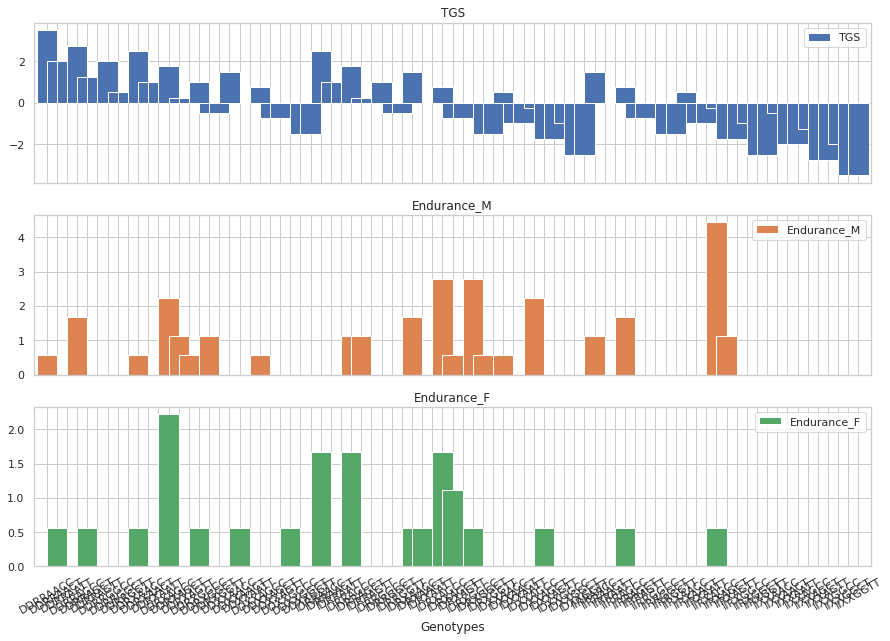

In [195]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,15))
#plt.xticks(rotation=45)
df_visualize[['TGS','Endurance_M','Endurance_F','Genotypes']].plot(kind='bar',x='Genotypes',figsize=(15,10),width=2, rot=30,subplots=True)


In [145]:
transformed=[]
cnames=df_visualize.columns
df_visualize.iloc[0]['Genotypes']
r,c=df_visualize.shape
#print(cnames[2:])

for i in range(0,r):
  for name in (cnames[2:]):
   transformed.append([df_visualize.iloc[i]['Genotypes'], df_visualize.iloc[i]['TGS'],df_visualize.iloc[i][name],name])

df_visualize_transformed=pd.DataFrame(transformed,columns=['GT','TGS','Percent%','Sport_Gender'])
df_visualize_transformed.tail(30)



,GT,TGS,Percent%,Sport_Gender
456,IIXXAGCT,-2.75,0.0,Endurance_M
457,IIXXAGCT,-2.75,0.0,Endurance_F
458,IIXXAGCT,-2.75,0.0,Power_M
459,IIXXAGCT,-2.75,0.0,Power_F
460,IIXXAGCT,-2.75,0.0,Mix_M
461,IIXXAGCT,-2.75,0.0,Mix_F
462,IIXXAGTT,-2.75,0.0,Endurance_M
463,IIXXAGTT,-2.75,0.0,Endurance_F
464,IIXXAGTT,-2.75,0.0,Power_M
465,IIXXAGTT,-2.75,0.0,Power_F


# Visualize with seaborn - distribution across genotypes

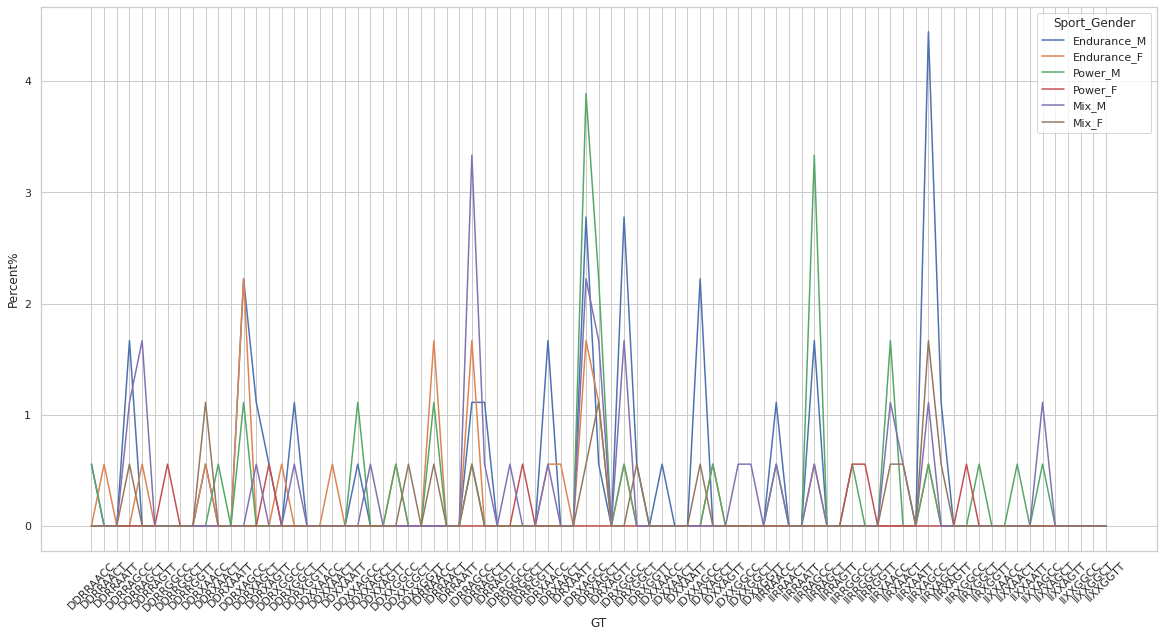

In [152]:
import seaborn as sns
import matplotlib.pylab as plt

#sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
#sns.barplot(x="GT", y="Percent%", hue="Sport_Gender",data=df_visualize_transformed)
plt.xticks(rotation=45)
sns.lineplot(x="GT", y="Percent%",hue="Sport_Gender",data=df_visualize_transformed)



# Application of decision tree to classify athletes into sports ctegories

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

tree = DecisionTreeClassifier(max_depth=5, random_state=0)
y=lt_athletes_data['class']
x=lt_athletes_data.drop('class',axis=1)
X=pd.get_dummies(x)
tree.fit(X, y)
tree.score(X, y)
y_pred = tree.predict(X)
print("Confusion table on training data")
print(confusion_matrix(y, y_pred))

Confusion table on training data
[[64 12  5]
 [22 31  2]
 [15 12 17]]


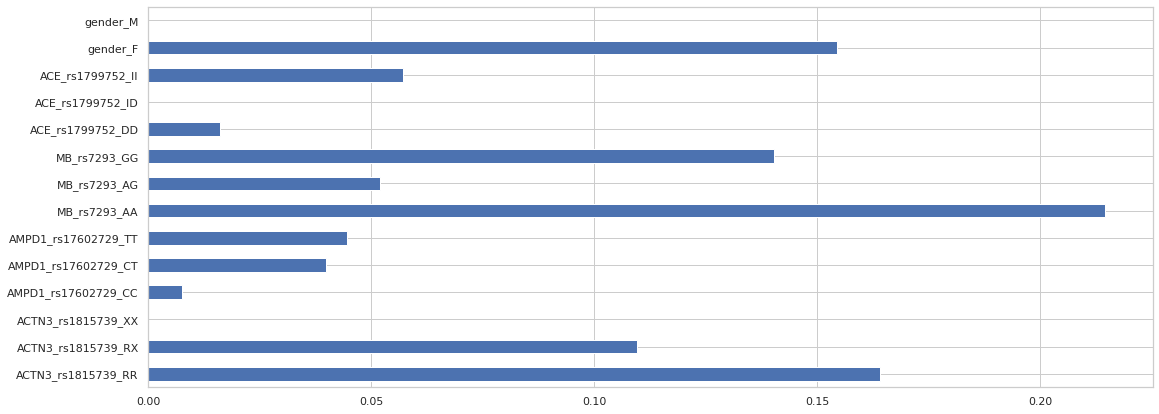

In [ ]:
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

# Decision tree separately on male data

tree score
0.5769230769230769
Confusion table on training data
[[42  7  5]
 [16 18  4]
 [20  3 15]]


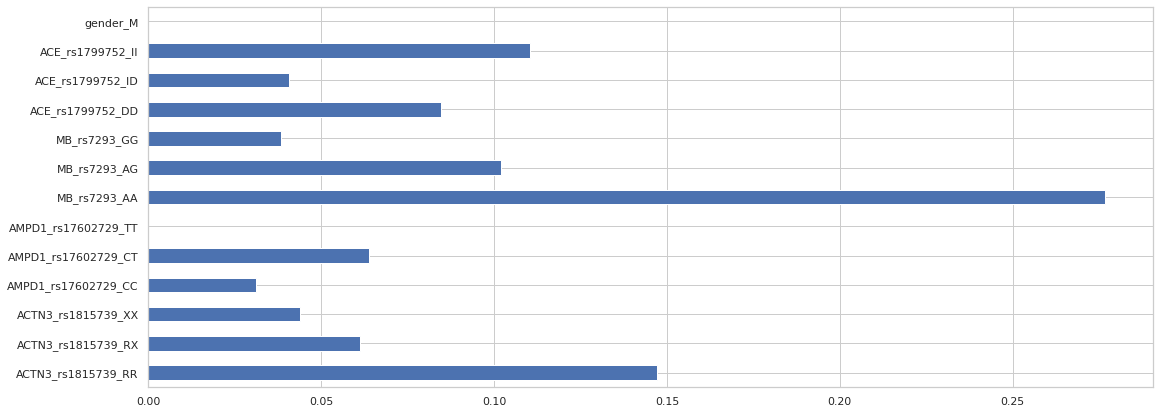

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

tree_male = DecisionTreeClassifier(max_depth=5, random_state=0)
lt_athletes_data_male=lt_athletes_data[(lt_athletes_data['gender']=='M')]
y_male=lt_athletes_data_male['class']
x=lt_athletes_data_male.drop('class',axis=1)
X_male=pd.get_dummies(x)
tree_male.fit(X_male, y_male)
y_pred_male = tree_male.predict(X_male)
print("tree score")
print(tree_male.score(X_male, y_male) )
print("Confusion table on training data")
print(confusion_matrix(y_male, y_pred_male))
%matplotlib inline
pd.Series(tree_male.feature_importances_, index=X_male.columns).plot.barh(figsize=(18,7));

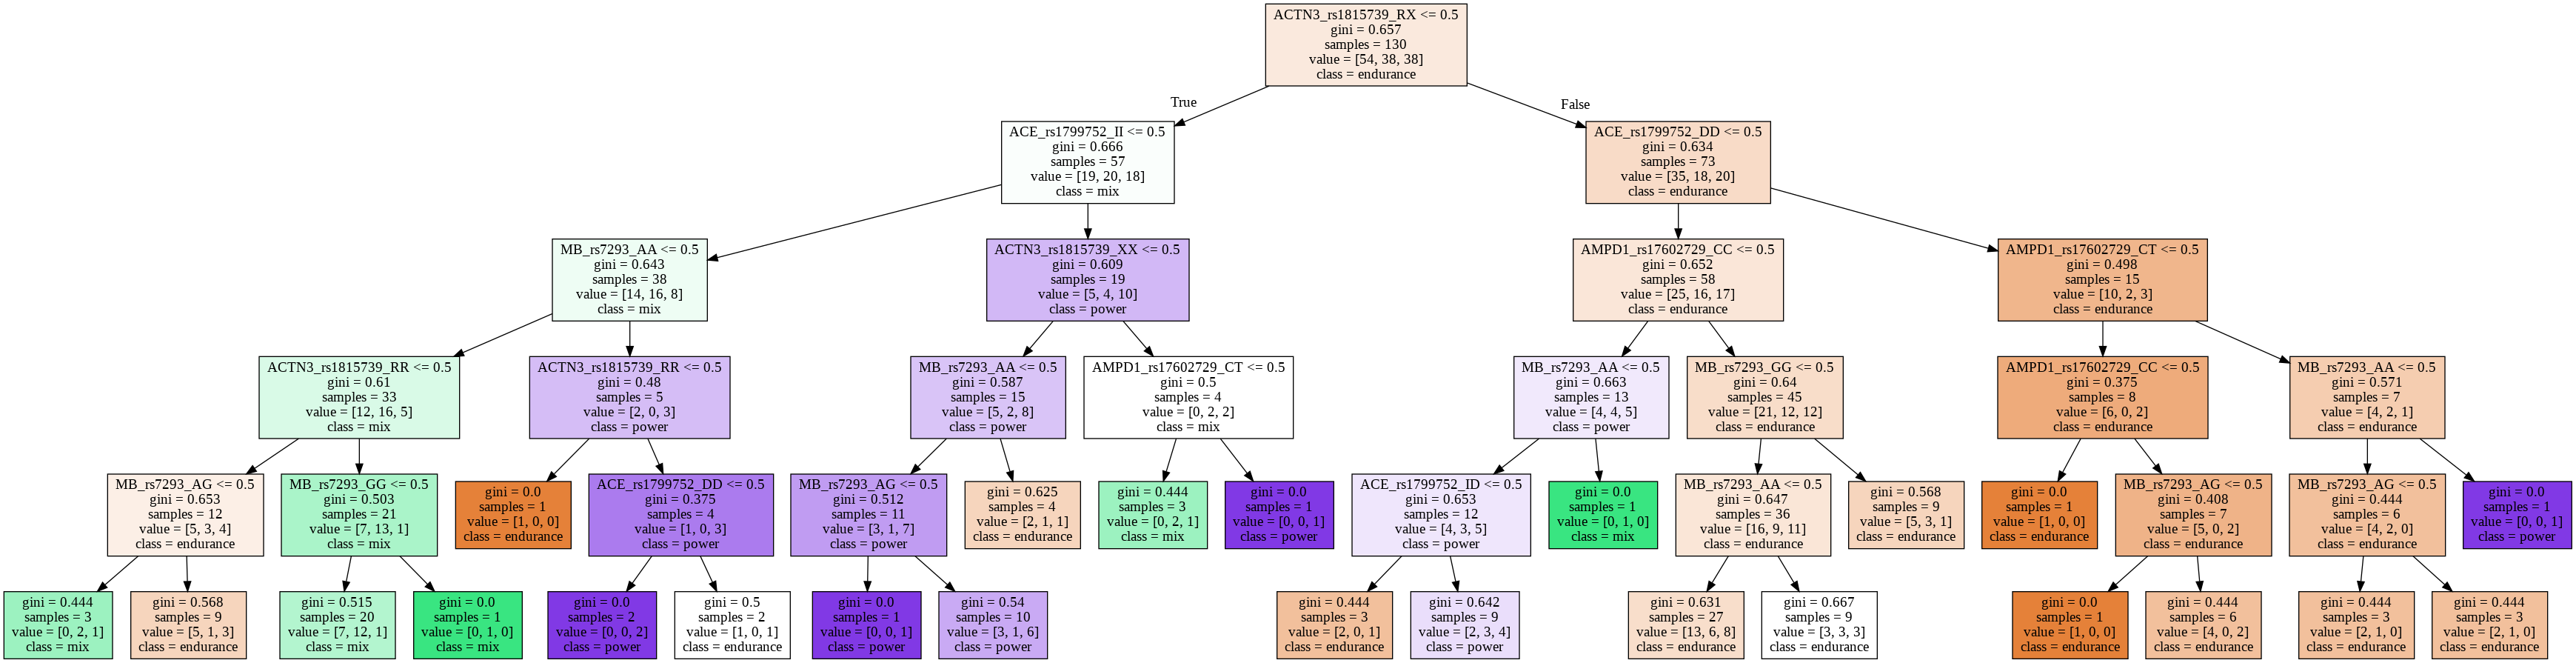

In [ ]:
# Figure out where graphviz executable lives
dotpath = !which dot
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree_male, feature_names=X_male.columns, out_file='ml-good.dot', class_names=['endurance','mix','power'], impurity=True, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

#Decision tree separately on female data

tree score
0.78
Confusion table on training data
[[26  1  0]
 [ 9  8  0]
 [ 1  0  5]]


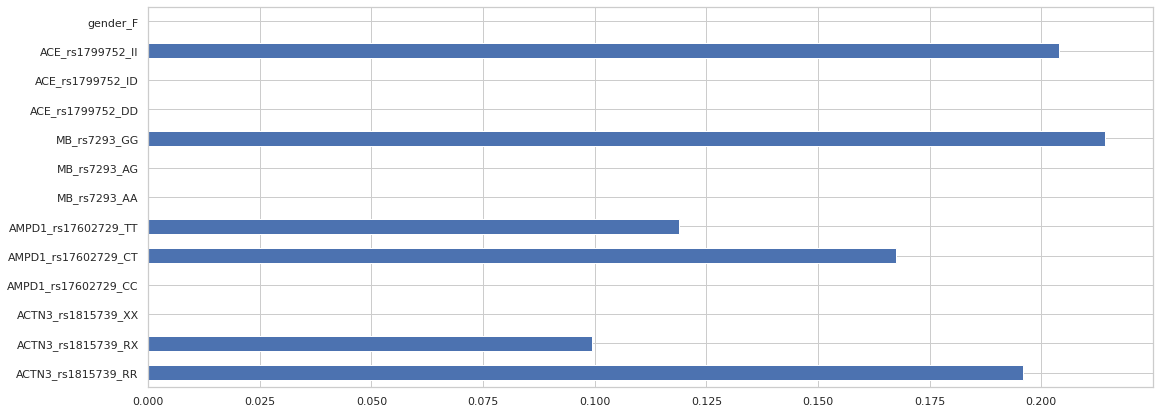

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

tree_female = DecisionTreeClassifier(max_depth=3, random_state=0)
lt_athletes_data_female=lt_athletes_data[(lt_athletes_data['gender']=='F')]
y_female=lt_athletes_data_female['class']
x=lt_athletes_data_female.drop('class',axis=1)
X_female=pd.get_dummies(x)
tree_female.fit(X_female, y_female)
y_pred_female = tree_female.predict(X_female)
print("tree score")
print(tree_female.score(X_female, y_female) )
print("Confusion table on training data")
print(confusion_matrix(y_female, y_pred_female))
%matplotlib inline
pd.Series(tree_female.feature_importances_, index=X_female.columns).plot.barh(figsize=(18,7));

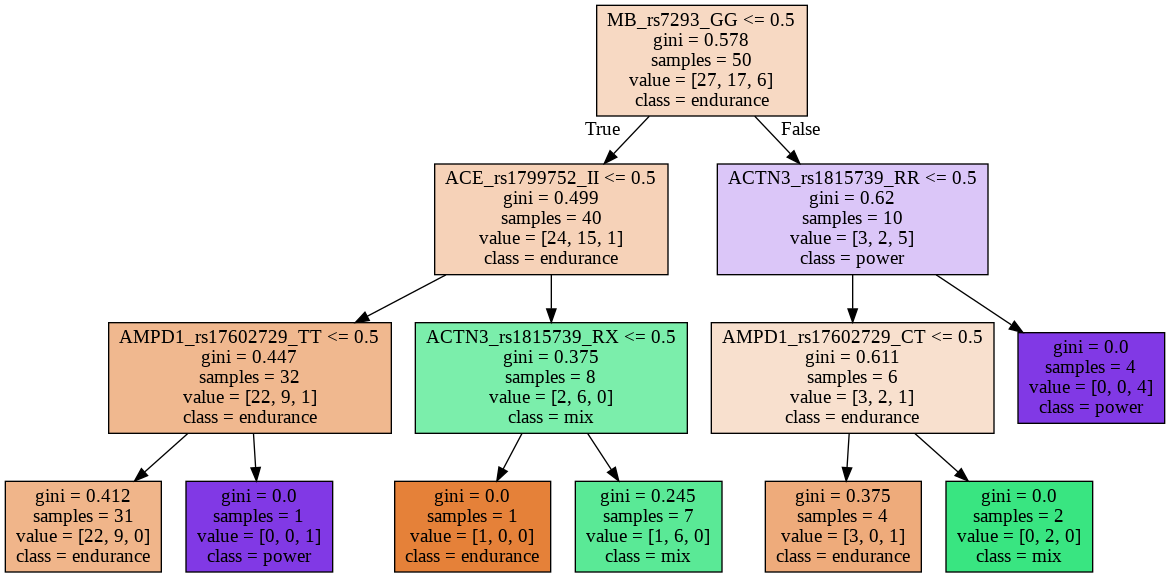

In [ ]:
# Figure out where graphviz executable lives
dotpath = !which dot
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree_female, feature_names=X_female.columns, out_file='ml-good.dot', class_names=['endurance','mix','power'], impurity=True, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

# Contingency tables of genotypes by gender and by sport
## Chi2 test

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

gendersports=pd.crosstab(lt_athletes_data['class'],lt_athletes_data['gender'])
print(gendersports)
c, p, dof, expected = chi2_contingency(gendersports)
print(p) 


ace=pd.crosstab(lt_athletes_data['ACE_rs1799752'],lt_athletes_data['gender'])
print(ace)
c, p, dof, expected = chi2_contingency(ace)
print(p) 

actn3=pd.crosstab(lt_athletes_data['ACTN3_rs1815739'],lt_athletes_data['gender'])
print(actn3)
c, p, dof, expected = chi2_contingency(actn3)
print(p) 

ampd1=pd.crosstab(lt_athletes_data['AMPD1_rs17602729'],lt_athletes_data['gender'])
print(ampd1)
c, p, dof, expected = chi2_contingency(ampd1)
print(p) 

mb=pd.crosstab(lt_athletes_data['MB_rs7293'],lt_athletes_data['gender'])
print(mb)
c, p, dof, expected = chi2_contingency(mb)
print(p) 

# contingency by sport

ace=pd.crosstab(lt_athletes_data['ACE_rs1799752'],lt_athletes_data['class'])
print(ace)
c, p, dof, expected = chi2_contingency(ace)
print(p) 

actn3=pd.crosstab(lt_athletes_data['ACTN3_rs1815739'],lt_athletes_data['class'])
print(actn3)
c, p, dof, expected = chi2_contingency(actn3)
print(p) 

ampd1=pd.crosstab(lt_athletes_data['AMPD1_rs17602729'],lt_athletes_data['class'])
print(ampd1)
c, p, dof, expected = chi2_contingency(ampd1)
print(p) 

mb=pd.crosstab(lt_athletes_data['MB_rs7293'],lt_athletes_data['class'])
print(mb)
c, p, dof, expected = chi2_contingency(mb)
print(p) 



gender      F   M
class            
endurance  27  54
mix        17  38
power       6  38
0.05231409138316346
gender          F   M
ACE_rs1799752        
DD             16  30
ID             23  61
II             11  39
0.3746217198085524
gender            F   M
ACTN3_rs1815739        
RR               16  40
RX               29  73
XX                5  17
0.8525605233963789
gender             F   M
AMPD1_rs17602729        
CC                34  99
CT                15  30
TT                 1   1
0.4701180036266156
gender      F   M
MB_rs7293        
AA         13  22
AG         27  89
GG         10  19
0.18713401208635144
class          endurance  mix  power
ACE_rs1799752                       
DD                    25   12      9
ID                    39   28     17
II                    17   15     18
0.15976469498644072
class            endurance  mix  power
ACTN3_rs1815739                       
RR                      22   18     16
RX                      50   30     22
XX     

# Frequencies


In [ ]:
import numpy as np
import pandas as pd
nr,nc=lt_athletes_data.shape
print(nr)
gts=np.zeros([nr,3], dtype=object)
for i in range(0,nr):
    drow   = lt_athletes_data.iloc[i]
    gta = drow['ACE_rs1799752']+drow['ACTN3_rs1815739']+drow['MB_rs7293']+drow['AMPD1_rs17602729']
    #print(gta)
    gts[i,0]=gta
    gts[i,1]=drow['class']
    gts[i,2]=drow['gender']
gtsdf=pd.DataFrame(gts,columns=['GTS','class','gender'])
gtsdf.tail()



180


,GTS,class,gender
175,IIRXAGCC,endurance,M
176,IIRRAGCC,endurance,M
177,IDRRAACC,endurance,F
178,IDXXAGCC,endurance,M
179,IDXXAGCT,endurance,F


In [ ]:
g=gtsdf.groupby(['GTS','gender','class'])['class'].count()
pd.set_option('max_rows',96 )
g


GTS       gender  class    
DDRRAACC  M       endurance    1
                  power        1
DDRRAACT  F       endurance    1
DDRRAGCC  F       mix          1
          M       endurance    3
                  mix          2
DDRRAGCT  F       endurance    1
          M       mix          3
DDRRGGCC  F       power        1
DDRXAACC  F       endurance    1
                  mix          2
          M       endurance    1
DDRXAACT  M       power        1
DDRXAGCC  F       endurance    4
          M       endurance    4
                  power        2
DDRXAGCT  M       endurance    2
                  mix          1
DDRXAGTT  F       power        1
          M       endurance    1
DDRXGGCC  F       endurance    1
DDRXGGCT  M       endurance    2
                  mix          1
DDXXAACT  F       endurance    1
DDXXAGCC  M       endurance    1
                  power        2
DDXXAGCT  M       mix          1
DDXXGGCC  F       endurance    1
          M       power        1
DDXXGGCT  F    

In [ ]:
gtsgender=pd.crosstab(gtsdf['GTS'],gtsdf['gender'])   
gtsclass=pd.crosstab(gtsdf['GTS'],gtsdf['class'])

# merge gtsclass and gtsgender
gtsm=pd.merge(gtsclass,gtsgender,on='GTS')
#gtsm1=gtsm.drop([0],axis=0)
#gtsm2=gtsm.drop(['0_x','0_y'],axis=1)

# Number of individuals with that genotype combination N

sum_column = gtsm["F"] + gtsm["M"]
gtsm["N"] = sum_column
gtsm['GTS']=gtsm.index
gtsm.head()


,endurance,mix,power,F,M,N,GTS
GTS,,,,,,,
DDRRAACC,1,0,1,0,2,2,DDRRAACC
DDRRAACT,1,0,0,1,0,1,DDRRAACT
DDRRAGCC,3,3,0,1,5,6,DDRRAGCC
DDRRAGCT,1,3,0,1,3,4,DDRRAGCT
DDRRGGCC,0,0,1,1,0,1,DDRRGGCC


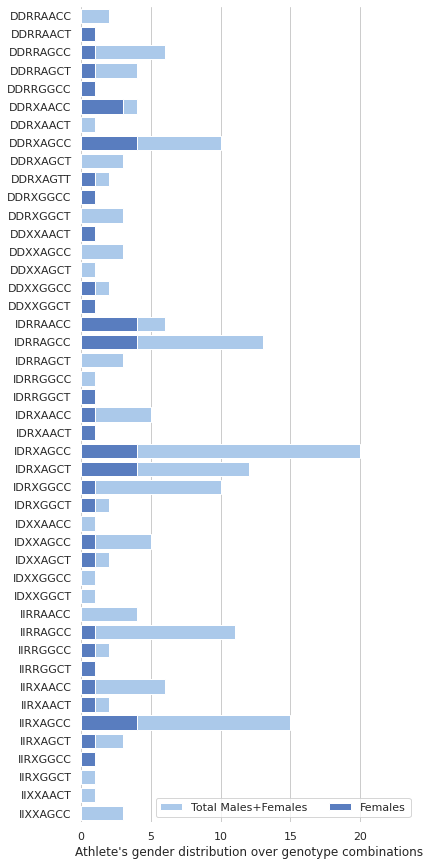

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
# Plot the total individuals with genotype combination
sns.set_color_codes("pastel")
sns.barplot(x="N", y="GTS", data=gtsm, label="Total Males+Females", color="b")

# Plot Females of the genotype
sns.set_color_codes("muted")
sns.barplot(x="F", y="GTS", data=gtsm, label="Females", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Athlete's gender distribution over genotype combinations")
sns.despine(left=True, bottom=True)




# Genotypes and sports 

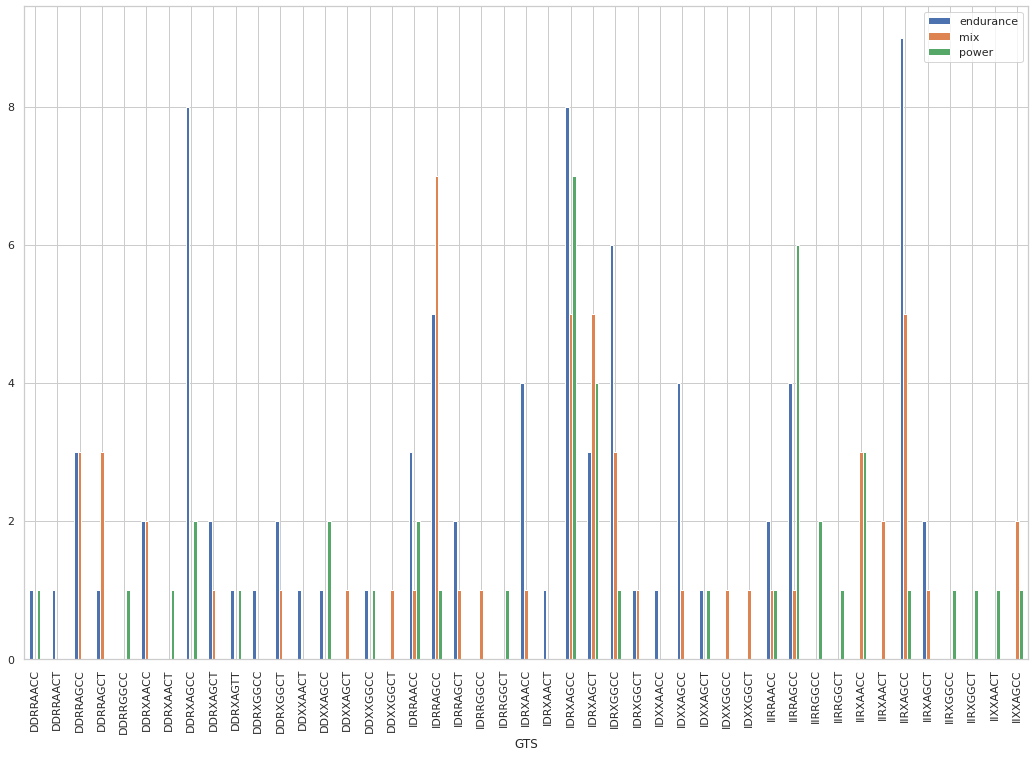

In [ ]:
gtsm.plot.bar(y=['endurance','mix','power'],figsize=(18,12))

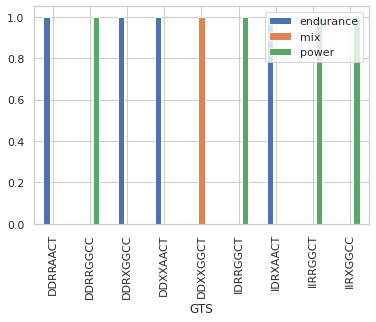

In [ ]:
gtsm2f=gtsm[(gtsm['M']==0)]
gtsm2f.plot.bar(y=['endurance','mix','power'])

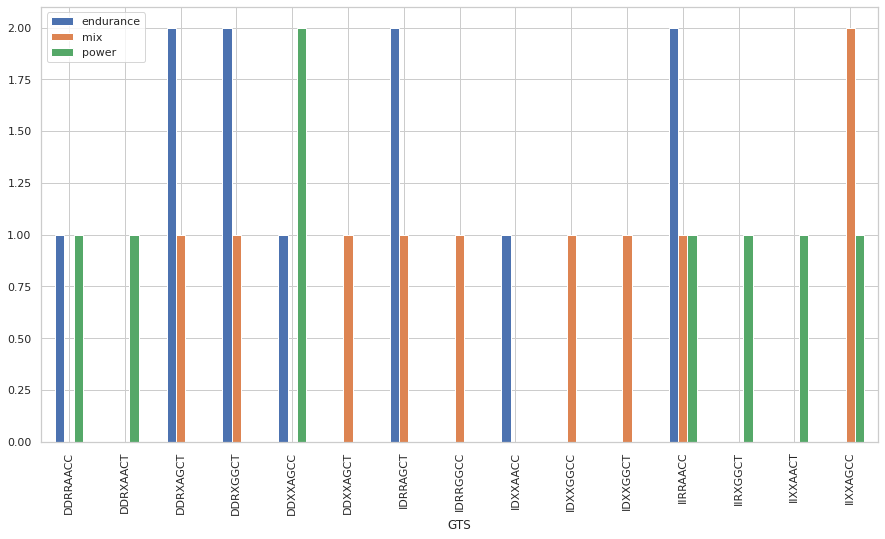

In [ ]:
gtsm2m=gtsm[(gtsm['F']==0)]
gtsm2m.plot.bar(y=['endurance','mix','power'],figsize=(15,8))

In [ ]:
gtsm2fm=pd.DataFrame(gtsm[(gtsm['F']!=0) & (gtsm['M']!=0)] )
gtsm2fm.index

Index(['DDRRAGCC', 'DDRRAGCT', 'DDRXAACC', 'DDRXAGCC', 'DDRXAGTT', 'DDXXGGCC',
       'IDRRAACC', 'IDRRAGCC', 'IDRXAACC', 'IDRXAGCC', 'IDRXAGCT', 'IDRXGGCC',
       'IDRXGGCT', 'IDXXAGCC', 'IDXXAGCT', 'IIRRAGCC', 'IIRRGGCC', 'IIRXAACC',
       'IIRXAACT', 'IIRXAGCC', 'IIRXAGCT'],
      dtype='object', name='GTS')

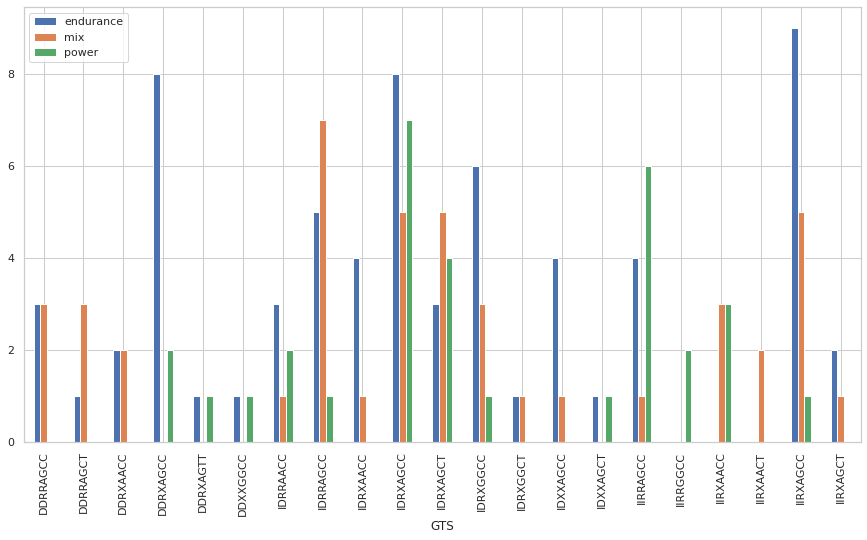

In [ ]:
gtsm2fm.plot.bar(y=['endurance','mix','power'],figsize=(15,8))



In [ ]:
import numpy as np
url="https://raw.githubusercontent.com/erinijapranckeviciene/ppolygenic/master/lt_athletes.csv"
lt_athletes_data = pd.read_csv(url)

lt_athletes_df=lt_athletes_data
nr,nc=lt_athletes_data.shape
print(nr)
dftgs=np.zeros([nr,1], dtype=float)
dftgsn=np.zeros([nr,1], dtype=float)
dftgs2=np.zeros([nr,1], dtype=float)
dftgsn2=np.zeros([nr,1], dtype=float)
dftgs3=np.zeros([nr,1], dtype=float)
dftgsn3=np.zeros([nr,1], dtype=float)
dftgs31=np.zeros([nr,1], dtype=float)
dftgsn31=np.zeros([nr,1], dtype=float)

for i in range(1,nr):
    drow   = lt_athletes_data.iloc[i]
    gtlist = 'rs1799752 '+drow['ACE_rs1799752']+', rs1815739 '+drow['ACTN3_rs1815739']+', rs7293 '+drow['MB_rs7293']+', rs17602729 '+drow['AMPD1_rs17602729']
    gtlist2 = 'rs1799752 '+drow['ACE_rs1799752']+', rs1815739 '+drow['ACTN3_rs1815739']
    gtlist3 = 'rs1799752 '+drow['ACE_rs1799752']+', rs1815739 '+drow['ACTN3_rs1815739']+', rs17602729 '+drow['AMPD1_rs17602729']
    gtlist31 = 'rs1799752 '+drow['ACE_rs1799752']+', rs1815739 '+drow['ACTN3_rs1815739']+', rs7293 '+drow['MB_rs7293']
    #print(drow['ACTN3_rs1815739'],drow['AMPD1_rs17602729'], drow['MB_rs7293'],drow['ACE_rs1799752'] )
    #print(gtlist)
    # call total genotype score
    tgs_endpow = total_genotype_score(gtlist, markers_endpow['endurance_power_vilnius'])
    tgs_endpow2 = total_genotype_score(gtlist2, markers_endpow['endurance_power_vilnius'])
    tgs_endpow3 = total_genotype_score(gtlist3, markers_endpow['endurance_power_vilnius'])
    tgs_endpow31 = total_genotype_score(gtlist31, markers_endpow['endurance_power_vilnius'])
    #print("Endurance power markers LT data: ",endpow_gt_list)
    #print("TGS computed: ", tgs_endpow)
    #print('TGS')
    #print(tgs_endpow[0])
    #print(tgs_endpow[1])
    dftgs[i]=tgs_endpow[0]
    dftgsn[i]=tgs_endpow[1]
    dftgs2[i]=tgs_endpow2[0]
    dftgsn2[i]=tgs_endpow2[1]
    dftgs3[i]=tgs_endpow3[0]
    dftgsn3[i]=tgs_endpow3[1]
    dftgs31[i]=tgs_endpow31[0]
    dftgsn31[i]=tgs_endpow31[1]
#add two columns to the athletes dataframe with data
lt_athletes_df.insert(nc, "TGS", dftgs, True)
lt_athletes_df.insert(nc+1, "TGSnorm", dftgsn, True)
lt_athletes_df.insert(nc+2, "TGSaceactn3", dftgs2, True)
lt_athletes_df.insert(nc+3, "TGSnormaceactn3", dftgsn2, True)
lt_athletes_df.insert(nc+4, "TGSaceactn3ampd1", dftgs3, True)
lt_athletes_df.insert(nc+5, "TGSnormaceactn3ampd1", dftgsn3, True)
lt_athletes_df.insert(nc+6, "TGSaceactn3mb", dftgs31, True)
lt_athletes_df.insert(nc+7, "TGSnormaceactn3mb", dftgsn31, True)
lt_athletes_df.insert(nc+8, 'ID', np.arange(1,181))
lt_athletes_df.tail()
lt_tgsnorm=lt_athletes_df.filter(['ID','class','gender','TGSnorm','TGSnormaceactn3','TGSnormaceactn3ampd1','TGSnormaceactn3mb'], axis=1)
lt_tgsnorm.head()
lt_tgslineplot=lt_athletes_df.filter(['class','gender','TGSnorm','TGSnormaceactn3','TGSnormaceactn3ampd1','TGSnormaceactn3mb'], axis=1)


180


In [ ]:
lt_tgslineplot.corr()

,TGSnorm,TGSnormaceactn3,TGSnormaceactn3ampd1,TGSnormaceactn3mb
TGSnorm,1.000000,0.730736,0.931679,0.843046
TGSnormaceactn3,0.730736,1.000000,0.804170,0.902237
TGSnormaceactn3ampd1,0.931679,0.804170,1.000000,0.755022
TGSnormaceactn3mb,0.843046,0.902237,0.755022,1.000000


# Visual analysis


#Pairplot of TGS

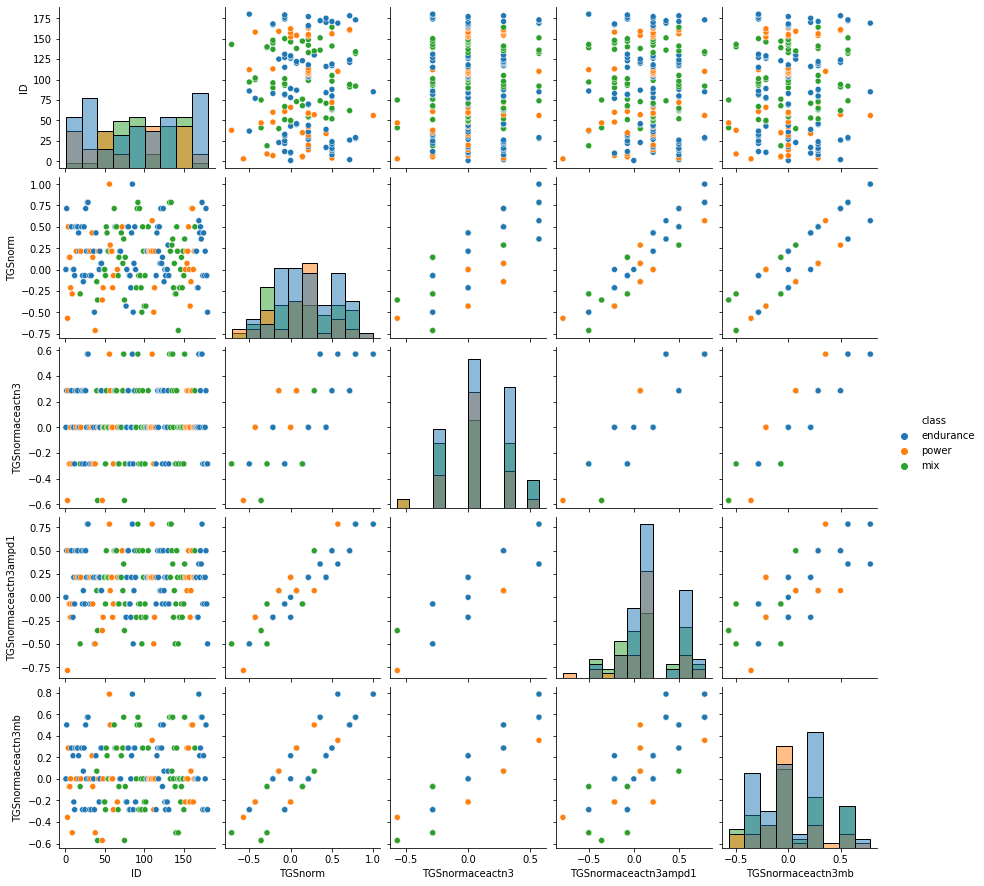

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.pairplot(lt_tgsnorm, hue='class',diag_kind="hist")


# Wide lineplot

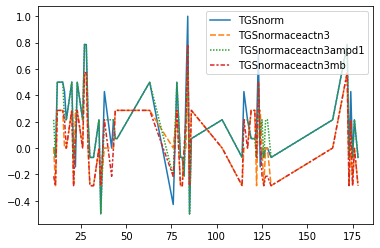

In [ ]:
lt_tgs_endurance_males=lt_tgslineplot[(lt_tgslineplot['class']=='endurance') & (lt_tgslineplot['gender']=='M')]
lt_tgs_endurance_females=lt_tgslineplot[(lt_tgslineplot['class']=='endurance') & (lt_tgslineplot['gender']=='F')]

lt_tgs_power=lt_tgslineplot[(lt_tgslineplot['class']=='power')]
lt_tgs_mix=lt_tgslineplot[(lt_tgslineplot['class']=='mix')]

#plt.figure(figsize=(15,8))
sns.lineplot(data=lt_tgs_endurance_males)


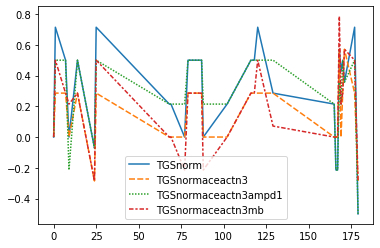

In [ ]:
#plt.figure(figsize=(15,8))
sns.lineplot(data=lt_tgs_endurance_females)

## TGS of all markers

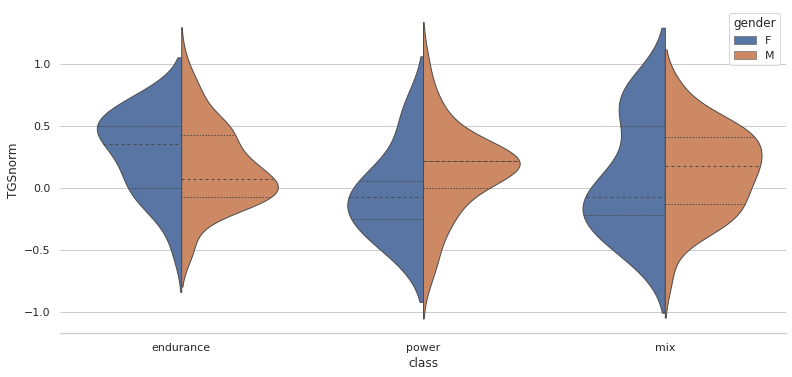

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
plt.figure(figsize=(13,6))
sns.violinplot(data=lt_athletes_df, x="class", y="TGSnorm", hue="gender",split=True, inner="quart", linewidth=1)
sns.despine(left=True)

# TGS of only ACE and ACT3

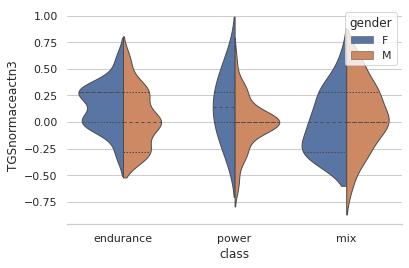

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=lt_athletes_df, x="class", y="TGSnormaceactn3", hue="gender",split=True, inner="quart", linewidth=1)
sns.despine(left=True)

# TGS of ACE and ACTN3 and AMPD1

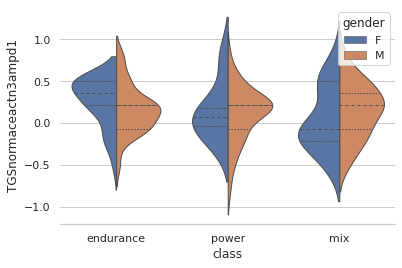

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=lt_athletes_df, x="class", y="TGSnormaceactn3ampd1", hue="gender",split=True, inner="quart", linewidth=1)
sns.despine(left=True)

# TGS of ACE and ACTN3 and MB

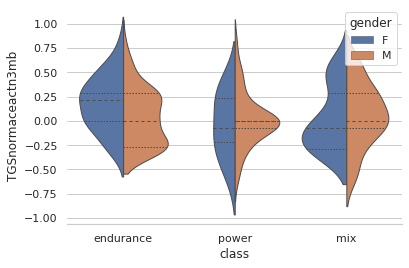

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=lt_athletes_df, x="class", y="TGSnormaceactn3mb", hue="gender",split=True, inner="quart", linewidth=1)
sns.despine(left=True)

# All markers TGS boxplot

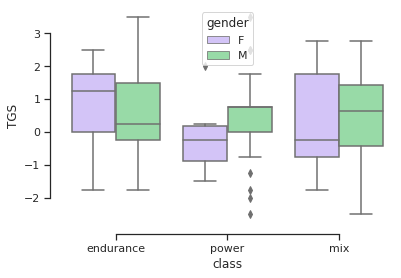

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="class", y="TGS",hue="gender", palette=["m", "g"],data=lt_athletes_df)
sns.despine(offset=10, trim=True)

# ACE and ACTN3 markers TGS box plot

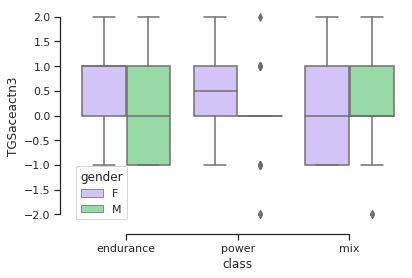

In [ ]:
sns.boxplot(x="class", y="TGSaceactn3",hue="gender", palette=["m", "g"],data=lt_athletes_df)
sns.despine(offset=10, trim=True)

# ACE and ACTN3 and AMPD1 markers TGS box plot

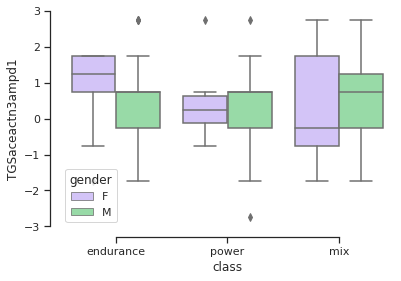

In [ ]:
sns.boxplot(x="class", y="TGSaceactn3ampd1",hue="gender", palette=["m", "g"],data=lt_athletes_df)
sns.despine(offset=10, trim=True)

# ACE and ACTN3 and MB markers TGS box plot

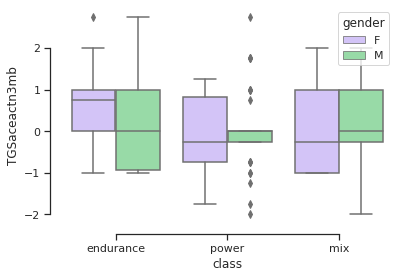

In [ ]:
sns.boxplot(x="class", y="TGSaceactn3mb",hue="gender", palette=["m", "g"],data=lt_athletes_df)
sns.despine(offset=10, trim=True)

# Testing TGS functions Tests of structures and computations
## **Injury markers**

In [ ]:
import sys
import itertools
import csv

#from tgs_functions import total_genotype_score, markers, markers_plus, genotype_combinations_tgs, generate_marker_table, marker_table_to_csv,class_table_csv_for_testing,labels

##############################################################################
# Testing markers computing all genotype combinations and TGS  frequency table
##############################################################################

####### Injury markers

injury_gt_list='rs12722 TT, rs1800012 AA, rs679620 GG'
injury_gt_list2='rs12722 CT, rs1800012 AA'

tgs_injury = total_genotype_score(injury_gt_list2,markers['injury'])
print("Injury markers: ",injury_gt_list2)
print("TGS computed: ", tgs_injury)

co = genotype_combinations_tgs(markers['injury'])
tg=co[0]
ft=co[1]

print("Injury markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Injury markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)



Injury markers:  rs12722 CT, rs1800012 AA
TGS computed:  [-1.0, -0.36363636363636365]
['rs12722 TT', 'rs1800012 CC', 'rs679620 AA']
['rs12722 TT', 'rs1800012 CC', 'rs679620 AG']
['rs12722 TT', 'rs1800012 CC', 'rs679620 GG']
['rs12722 TT', 'rs1800012 AC', 'rs679620 AA']
['rs12722 TT', 'rs1800012 AC', 'rs679620 AG']
['rs12722 TT', 'rs1800012 AC', 'rs679620 GG']
['rs12722 TT', 'rs1800012 AA', 'rs679620 AA']
['rs12722 TT', 'rs1800012 AA', 'rs679620 AG']
['rs12722 TT', 'rs1800012 AA', 'rs679620 GG']
['rs12722 CT', 'rs1800012 CC', 'rs679620 AA']
['rs12722 CT', 'rs1800012 CC', 'rs679620 AG']
['rs12722 CT', 'rs1800012 CC', 'rs679620 GG']
['rs12722 CT', 'rs1800012 AC', 'rs679620 AA']
['rs12722 CT', 'rs1800012 AC', 'rs679620 AG']
['rs12722 CT', 'rs1800012 AC', 'rs679620 GG']
['rs12722 CT', 'rs1800012 AA', 'rs679620 AA']
['rs12722 CT', 'rs1800012 AA', 'rs679620 AG']
['rs12722 CT', 'rs1800012 AA', 'rs679620 GG']
['rs12722 CC', 'rs1800012 CC', 'rs679620 AA']
['rs12722 CC', 'rs1800012 CC', 'rs679620

## **Power-endurance markers**

In [ ]:
####### Endurance and power markers

endurance_power_gt_list='rs699 AA, rs1042713 AG, rs11549465 CT'

tgs_endurance_power = total_genotype_score(endurance_power_gt_list,markers['endurance_power'])
print("Endurance_power markers: ",endurance_power_gt_list) 
print("TGS computed: ", tgs_endurance_power)

co = genotype_combinations_tgs(markers['endurance_power'])
tg=co[0]
ft=co[1]

print("Endurance and power markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Endurance and power markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)


Endurance_power markers:  rs699 AA, rs1042713 AG, rs11549465 CT
TGS computed:  [1.0, 0.3333333333333333]
['rs699 AA', 'rs1042713 AA', 'rs11549465 CC']
['rs699 AA', 'rs1042713 AA', 'rs11549465 CT']
['rs699 AA', 'rs1042713 AA', 'rs11549465 TT']
['rs699 AA', 'rs1042713 AG', 'rs11549465 CC']
['rs699 AA', 'rs1042713 AG', 'rs11549465 CT']
['rs699 AA', 'rs1042713 AG', 'rs11549465 TT']
['rs699 AA', 'rs1042713 GG', 'rs11549465 CC']
['rs699 AA', 'rs1042713 GG', 'rs11549465 CT']
['rs699 AA', 'rs1042713 GG', 'rs11549465 TT']
['rs699 AG', 'rs1042713 AA', 'rs11549465 CC']
['rs699 AG', 'rs1042713 AA', 'rs11549465 CT']
['rs699 AG', 'rs1042713 AA', 'rs11549465 TT']
['rs699 AG', 'rs1042713 AG', 'rs11549465 CC']
['rs699 AG', 'rs1042713 AG', 'rs11549465 CT']
['rs699 AG', 'rs1042713 AG', 'rs11549465 TT']
['rs699 AG', 'rs1042713 GG', 'rs11549465 CC']
['rs699 AG', 'rs1042713 GG', 'rs11549465 CT']
['rs699 AG', 'rs1042713 GG', 'rs11549465 TT']
['rs699 GG', 'rs1042713 AA', 'rs11549465 CC']
['rs699 GG', 'rs10427

## **Vitamin B12 markers**

In [ ]:


####### Vitamin B12 markers

vitaminB12_gt_list='rs1801133 GG, rs602662 AA, rs526934 AG, rs1801222 CC'

tgs_vitaminB12 = total_genotype_score(vitaminB12_gt_list,markers['vitaminB12'])
print("VitaminB12 markers: ",vitaminB12_gt_list) 
print("TGS computed: ", tgs_vitaminB12)

co = genotype_combinations_tgs(markers['vitaminB12'])
tg=co[0]
ft=co[1]

print("Vitamin B12 status markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Vitamin B12 status markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)

VitaminB12 markers:  rs1801133 GG, rs602662 AA, rs526934 AG, rs1801222 CC
TGS computed:  [0.7, 0.175]
['rs1801133 GG', 'rs602662 AA', 'rs526934 AA', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AA', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AA', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AG', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AG', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 AG', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 GG', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AA', 'rs526934 GG', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AA', 'rs526934 GG', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AA', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AA', 'rs1801222 CT']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AA', 'rs1801222 TT']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AG', 'rs1801222 CC']
['rs1801133 GG', 'rs602662 AG', 'rs526934 AG', 'rs1801222 CT']
['rs1801133 GG',